In [201]:
"""
DESCRIPTION:
Comcast is an American global telecommunication company. The firm has been providing terrible customer service. 
They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, 
after receiving over 1000 consumer complaints. The existing database will serve as a repository of public customer complaints filed 
against Comcast. It will help to pin down what is wrong with Comcast's customer service.
"""

"\nDESCRIPTION:\nComcast is an American global telecommunication company. The firm has been providing terrible customer service. \nThey continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, \nafter receiving over 1000 consumer complaints. The existing database will serve as a repository of public customer complaints filed \nagainst Comcast. It will help to pin down what is wrong with Comcast's customer service.\n"

In [202]:
"""
Analysis Tasks:
To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, 
matplotlib, and BeautifulSoup.
- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.
- Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. 
- Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
    Which state has the maximum complaints
    Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.
"""

'\nAnalysis Tasks:\nTo perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, \nmatplotlib, and BeautifulSoup.\n- Import data into Python environment.\n- Provide the trend chart for the number of complaints at monthly and daily granularity levels.\n- Provide a table with the frequency of complaint types.\n- Which complaint types are maximum i.e., around internet, network issues, or across any other domains.\n- Create a new categorical variable with value as Open and Closed. \n- Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.\n- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:\n    Which state has the maximum complaints\n    Which state has the highest percentage of unresolved complaints\n- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care cal

In [203]:
#Importing data into Python environment
import pandas as pd
complaints_df=pd.read_csv("E:/Education/PGP Simplilearn-Purdue/PGP in Data Science/Data Science with Python/Projects/Comcast_telecom_complaints_data.csv")
complaints_df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,4/8/2015,4-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,5-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,4/2/2015,4-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,6/2/2015,6-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,6/9/2015,6-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [204]:
complaints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [205]:
#Provide the trend chart for the number of complaints at monthly and daily granularity levels
#Converting Date_month_year column to date type
complaints_df.Date_month_year=pd.to_datetime(complaints_df.Date_month_year,format="%d-%b-%y")
complaints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   object        
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

In [206]:
#Creating a new month column
complaints_df['Month_Num']=complaints_df['Date_month_year'].dt.month
#Grouping by Month
complaints_monthly=pd.DataFrame(complaints_df.groupby(['Month_Num']).agg({'Month_Num':'count'}))
#Changing index from month number to month name
complaints_monthly.index=pd.to_datetime(complaints_monthly.index,format="%m")
complaints_monthly.index=complaints_monthly.index.strftime("%b")
complaints_monthly

,Month_Num
Month_Num,
Jan,55
Feb,59
Mar,45
Apr,375
May,317
Jun,1046
Jul,49
Aug,67
Sep,55


Text(0.5, 1.0, 'Monthly Complaints Trend')

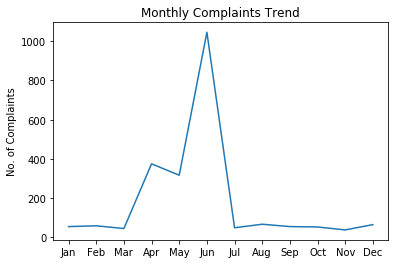

In [207]:
#Monthly Trend Chart
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(complaints_monthly)
plt.ylabel('No. of Complaints')
plt.title('Monthly Complaints Trend')
#Insight:
#Customer complaints soared from April and reached peak in June before plummeting in July (to Jan-Mar levels) and 
#remained stable till December  

In [208]:
#Sorting complaints by Date
complaints_df.sort_values(by="Date_month_year",inplace=True)
complaints_df=complaints_df.reset_index(drop=True)
complaints_df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month_Num
0,211472,comcast cable,4/1/2015,2015-01-04,10:43:20 AM,Customer Care Call,Lockport,Illinois,60441,Closed,No,1
1,213355,Comcast is ignoring me now. They are making NO...,4/1/2015,2015-01-04,10:56:15 PM,Internet,Golden,Colorado,80401,Closed,No,1
2,213198,Fradulent Services,4/1/2015,2015-01-04,8:56:38 PM,Customer Care Call,Waukegan,Illinois,60085,Closed,No,1
3,212818,Incorrect Billing,4/1/2015,2015-01-04,5:39:39 PM,Customer Care Call,Boynton Beach,Florida,33426,Closed,No,1
4,211904,Unable to get in touch with anyone that has th...,4/1/2015,2015-01-04,1:06:33 PM,Customer Care Call,Huntsville,Alabama,35801,Closed,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2219,337489,Comcast not refunding my credit,6/12/2015,2015-12-06,3:59:57 PM,Internet,Alpharetta,Georgia,30005,Solved,No,12
2220,336690,Comcast Data Caps,6/12/2015,2015-12-06,11:52:00 AM,Customer Care Call,Knoxville,Tennessee,37919,Solved,No,12
2221,336234,Unresolved Issues,6/12/2015,2015-12-06,7:59:56 AM,Customer Care Call,Colorado Springs,Colorado,80909,Closed,No,12
2222,336532,Billing & Customer Service Issues,6/12/2015,2015-12-06,11:17:31 AM,Internet,Savannah,Georgia,31406,Solved,No,12


Text(0.5, 1.0, 'Daily Complaints Trend')

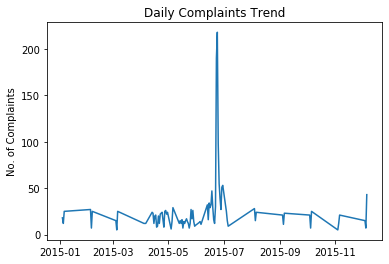

In [209]:
#Grouping by Date
complaints_daily=pd.DataFrame(complaints_df.groupby(['Date_month_year']).agg({'Date_month_year':'count'}))
#Daily Trend Chart
plt.plot(complaints_daily)
plt.ylabel('No. of Complaints')
plt.title('Daily Complaints Trend')
#Insights:
#Daily complaint counts are stable (more or less) from Jan-Mar and July-December period
#Daily complaints are more volatile during Apr-Jun Period and reached peak complaints of >200 during late june

In [210]:
# Provide a table with the frequency of complaint types
# Which complaint types are maximum i.e., around internet, network issues, or across any other domains
#Word cloud
from io import StringIO
import nltk
import collections as co
from wordcloud import WordCloud
customer_complaints=pd.DataFrame(complaints_df['Customer Complaint'])
s=StringIO()
customer_complaints['Customer Complaint'].apply(lambda x: s.write(x))
k=s.getvalue() # Array of words, with stop words removed
s.close() # Concatinated string of all comments
k=k.lower()
k=k.split()
words = co.Counter(nltk.corpus.words.words())
# removing most commonly used words from strings
stopWords =co.Counter( nltk.corpus.stopwords.words() )
k=[i for i in k if i in words and i not in stopWords]
s=" ".join(k)
c = co.Counter(k) # Collection of words
#Top 10 most commonly used words
complaint_freq=pd.DataFrame(c.most_common(10))
complaint_freq.columns=['Compliant_Term','Frequency']
complaint_freq
#Insight:
#Complaints around service,data and billing are top 3 areas that comcast should focus on in the short term

,Compliant_Term,Frequency
0,service,211
1,data,156
2,billing,149
3,customer,74
4,speed,53
5,usage,39
6,bill,36
7,cable,32
8,cap,31
9,throttling,27


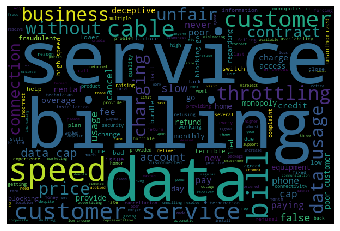

In [211]:
#Genrating wordcloud for top complaint areas
wordcloud=WordCloud(width=600,height=400).generate(s)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [212]:
# Create a new categorical variable with value as Open and Closed
# Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed
complaints_df['New_Status']=["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in complaints_df['Status']]
complaints_df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month_Num,New_Status
0,211472,comcast cable,4/1/2015,2015-01-04,10:43:20 AM,Customer Care Call,Lockport,Illinois,60441,Closed,No,1,Closed
1,213355,Comcast is ignoring me now. They are making NO...,4/1/2015,2015-01-04,10:56:15 PM,Internet,Golden,Colorado,80401,Closed,No,1,Closed
2,213198,Fradulent Services,4/1/2015,2015-01-04,8:56:38 PM,Customer Care Call,Waukegan,Illinois,60085,Closed,No,1,Closed
3,212818,Incorrect Billing,4/1/2015,2015-01-04,5:39:39 PM,Customer Care Call,Boynton Beach,Florida,33426,Closed,No,1,Closed
4,211904,Unable to get in touch with anyone that has th...,4/1/2015,2015-01-04,1:06:33 PM,Customer Care Call,Huntsville,Alabama,35801,Closed,No,1,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,337489,Comcast not refunding my credit,6/12/2015,2015-12-06,3:59:57 PM,Internet,Alpharetta,Georgia,30005,Solved,No,12,Closed
2220,336690,Comcast Data Caps,6/12/2015,2015-12-06,11:52:00 AM,Customer Care Call,Knoxville,Tennessee,37919,Solved,No,12,Closed
2221,336234,Unresolved Issues,6/12/2015,2015-12-06,7:59:56 AM,Customer Care Call,Colorado Springs,Colorado,80909,Closed,No,12,Closed
2222,336532,Billing & Customer Service Issues,6/12/2015,2015-12-06,11:17:31 AM,Internet,Savannah,Georgia,31406,Solved,No,12,Closed


In [213]:
#Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
# Which state has the maximum complaints
# Which state has the highest percentage of unresolved complaints
complaints_state=pd.DataFrame(complaints_df.groupby('State').agg({'State':'count'}))
complaints_state
#Observation:
#District of columbia is appearing twice due to grammatical error

,State
State,
Alabama,26
Arizona,20
Arkansas,6
California,220
Colorado,80
Connecticut,12
Delaware,12
District Of Columbia,16
District of Columbia,1


In [214]:
#Correcting 'District Of Columbia' State name
complaints_df['State']=["District Of Columbia" if State=='District of Columbia' else State for State in complaints_df['State']]
#Grouping by state and status
complaints_state=complaints_df.groupby(['State','New_Status']).size().unstack().fillna(0)
complaints_state

New_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,15.0,2.0
Florida,201.0,39.0


<BarContainer object of 42 artists>

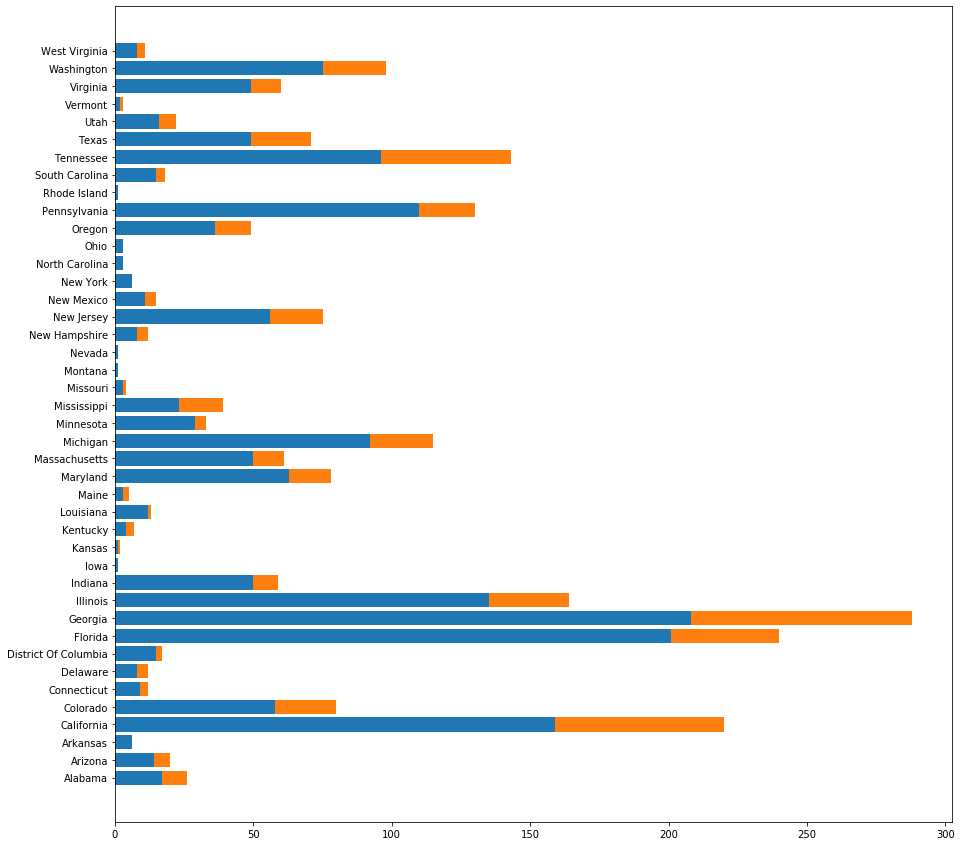

In [215]:
#Visualizing complaint status count by state
plt.figure(figsize=(15,15))
plt.barh(complaints_state.index,complaints_state.Closed)
plt.barh(complaints_state.index,complaints_state.Open,left=complaints_state.Closed)
#Insight:
#Georgia has the highest number of 288 complaints

In [216]:
#Calculating unresolved percentage of complaints across different states
complaints_state['Unresolved_pct']=complaints_state['Open']*100/(complaints_state['Open'].sum())
complaints_state
#Insight:
#Georgia has highest percent(15.47%) of unresolved complaints

New_Status,Closed,Open,Unresolved_pct
State,,,
Alabama,17.0,9.0,1.740812
Arizona,14.0,6.0,1.160542
Arkansas,6.0,0.0,0.000000
California,159.0,61.0,11.798839
Colorado,58.0,22.0,4.255319
Connecticut,9.0,3.0,0.580271
Delaware,8.0,4.0,0.773694
District Of Columbia,15.0,2.0,0.386847
Florida,201.0,39.0,7.543520


In [217]:
#Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls
complaints_rv=complaints_df.groupby(['Received Via','New_Status']).size().unstack()
complaints_rv

New_Status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [218]:
#Calculating resolution percentage by channel
complaints_rv['resolved_pct']=complaints_rv['Closed']*100/(complaints_rv['Open']+complaints_rv['Closed'])
complaints_rv
#Insights:
#77.21% issues received through the customer care calls were resolved
#76.28% issues received through the customer care calls were resolved
#Resolution percentage for complaints across both the channels are similar

New_Status,Closed,Open,resolved_pct
Received Via,,,
Customer Care Call,864,255,77.211796
Internet,843,262,76.289593
